# 라이브러리 호출

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from string import ascii_lowercase
from itertools import combinations

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import  GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# 데이터 불러오기



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/Shareddrives/2022-KUBIG CONTEST_머신러닝 4팀/train.csv")
test=pd.read_csv("/content/drive/Shareddrives/2022-KUBIG CONTEST_머신러닝 4팀/test_x.csv")

In [ ]:
train.shape

(45532, 78)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

In [ ]:
train['voted'] = train['voted'] - 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


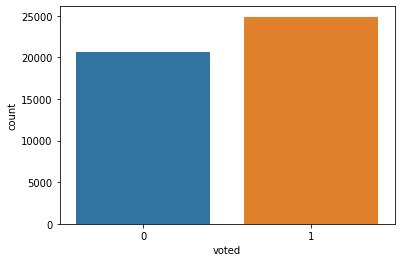

In [ ]:
sns.countplot('voted', data= train)

In [ ]:
train['QaA'].head()

0    3.0
1    5.0
2    4.0
3    3.0
4    1.0
Name: QaA, dtype: float64

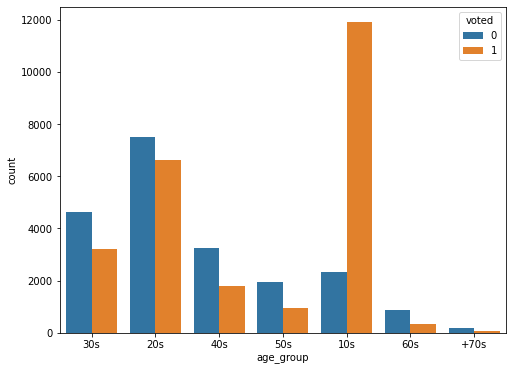

In [ ]:
# age_group

plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'age_group', hue = train['voted'])

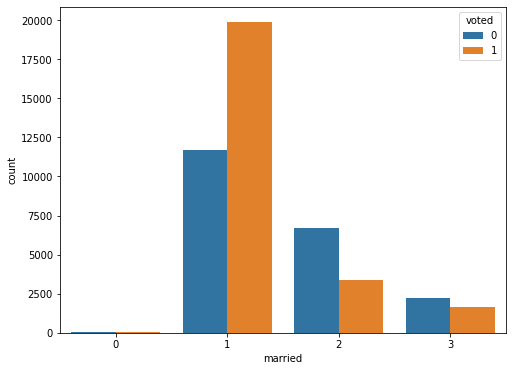

In [ ]:
# married

plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'married', hue = train['voted'])

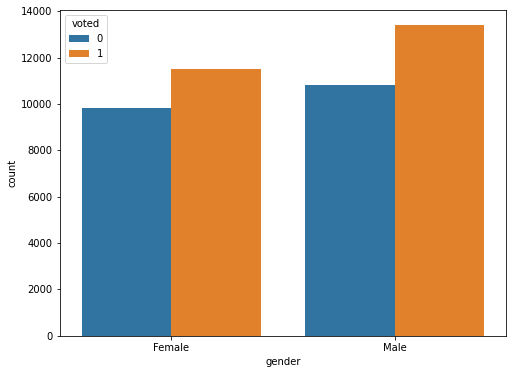

In [ ]:
# gender

plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'gender', hue = train['voted'])

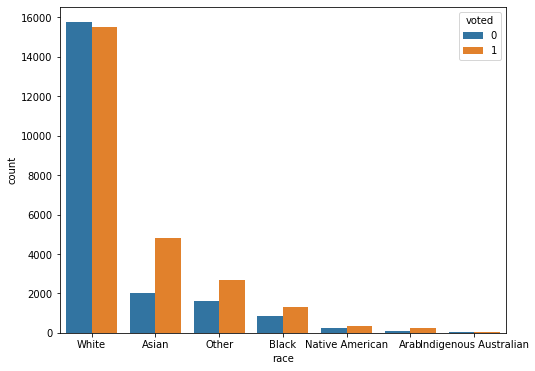

In [ ]:
# race

plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'race', hue = train['voted'])

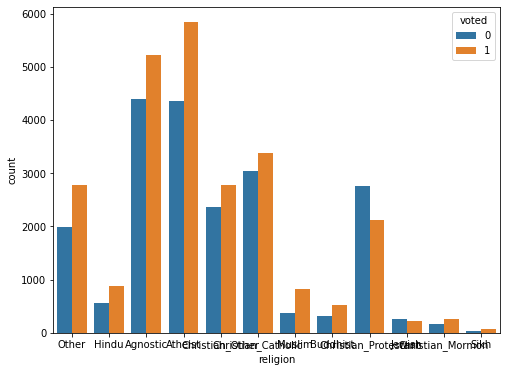

In [ ]:
# religion

plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'religion', hue = train['voted'])

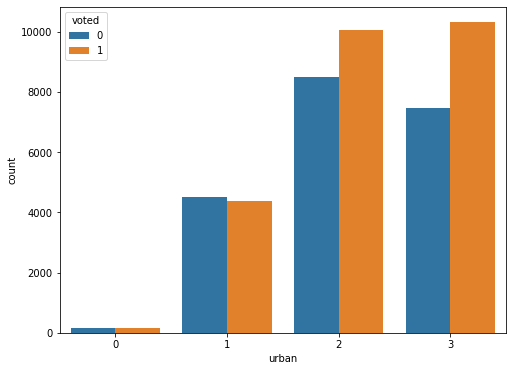

In [ ]:
# urban

plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'urban', hue = train['voted'])

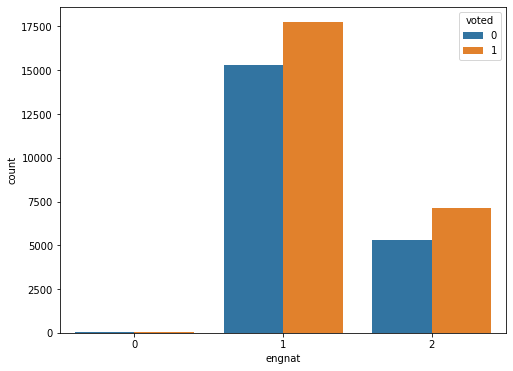

In [ ]:
# engnat

plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'engnat', hue = train['voted'])

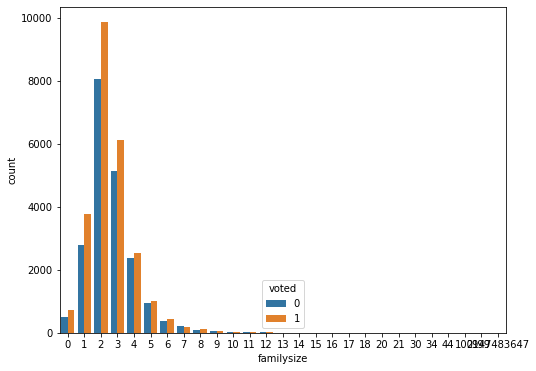

In [ ]:
# familysize

plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'familysize', hue = train['voted'])

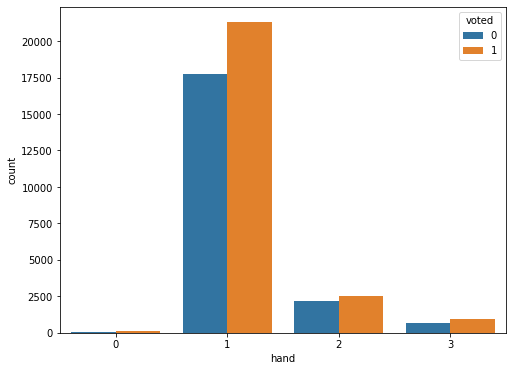

In [ ]:
# hand

plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'hand', hue = train['voted'])

# 이상치 제거

In [ ]:
dataset = [train, test]

In [ ]:
train['familysize'].value_counts() # 이상치 제거 필요

2             17918
3             11256
1              6535
4              4907
5              1962
0              1217
6               838
7               387
8               221
9               126
10               59
11               39
12               21
13               11
14                9
15                8
44                3
17                3
21                2
20                2
16                2
999               1
2147483647        1
100               1
34                1
30                1
18                1
Name: familysize, dtype: int64

In [ ]:
train.shape

(45532, 78)

In [ ]:
''' 

#IQR 방식 

def get_outlier(df=None, column=None, weight=1.5):
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx


for data in dataset:
  oulier_idx = get_outlier(df=data, column='familysize', weight=1.5)
  data.drop(oulier_idx, axis=0, inplace=True)

'''

" \n\n#IQR 방식 \n\ndef get_outlier(df=None, column=None, weight=1.5):\n  quantile_25 = np.percentile(df[column].values, 25)\n  quantile_75 = np.percentile(df[column].values, 75)\n\n  IQR = quantile_75 - quantile_25\n  IQR_weight = IQR*weight\n  \n  lowest = quantile_25 - IQR_weight\n  highest = quantile_75 + IQR_weight\n  \n  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index\n  return outlier_idx\n\n\nfor data in dataset:\n  oulier_idx = get_outlier(df=data, column='familysize', weight=1.5)\n  data.drop(oulier_idx, axis=0, inplace=True)\n\n"

In [ ]:
train.shape

(45532, 78)

In [ ]:
train['familysize'].value_counts() # 너무 많이 제거됨 5 ~ 9 정도는 유지

2             17918
3             11256
1              6535
4              4907
5              1962
0              1217
6               838
7               387
8               221
9               126
10               59
11               39
12               21
13               11
14                9
15                8
44                3
17                3
21                2
20                2
16                2
999               1
2147483647        1
100               1
34                1
30                1
18                1
Name: familysize, dtype: int64

In [ ]:
for data in dataset:
  cond = data['familysize'] >= 10
  outlier = data[cond].index
  data.drop(outlier, axis=0, inplace=True)

In [ ]:
train.shape

(45367, 78)

In [ ]:
train['familysize'].value_counts() 

2    17918
3    11256
1     6535
4     4907
5     1962
0     1217
6      838
7      387
8      221
9      126
Name: familysize, dtype: int64

### 마키아밸리 테스트 파생변수

In [ ]:
# Q_A 변수 선택

questions = [i for i in list(ascii_lowercase)[:20]]
answers = [('Q'+i+'A') for i in questions]


# << 3개로 >>
# Tactic/ Morality/ View에 따라 feature 항목 분류

for data in dataset:
  data['T'] = data['QcA'] - data['QfA'] + data['QoA'] - data['QrA'] + data['QsA']
  data['V'] = data['QbA'] - data['QeA'] + data['QhA'] + data['QjA'] + data['QmA'] - data['QqA']
  data['M'] = - data['QkA']

In [ ]:
# 성향을 나타내는 방향 맞춰주기

flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for data in dataset:
  for flip in flipping_columns: 
    data[flip] = 6 - data[flip]

flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for data in dataset:
  for flip in flipping_secret_columns: 
    data[flip] = 6 - data[flip]

In [ ]:
# Q_A 답변값으로 마키아밸리 성향을 나타내는 변수 생성 << 1개로 >>

for data in dataset:
  data['Mach_score'] = data[answers].mean(axis = 1)

# Q_E 값으로 지연된 시간을 나타내는 delay 변수 생성 

for data in dataset:
  data['delay'] = data[[('Q'+i+'E') for i in questions]].sum(axis=1)
  data['delay'] = data['delay'] ** (1/10)

In [ ]:
# 기존 Q_A, Q_E 변수 제거

for data in dataset:
  data.drop([('Q'+i+'A') for i in questions], axis = 1, inplace = True)
  data.drop([('Q'+i+'E') for i in questions], axis = 1, inplace = True)

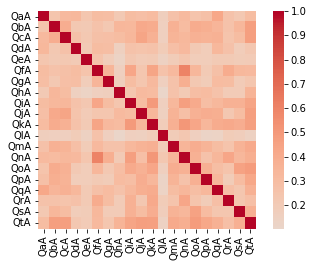

In [ ]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']
correlations = train[Answers].corr(method='spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

### tipi test 관련 파생 변수

In [ ]:
tps = ['tp01', 'tp02', 'tp03', 'tp04', 'tp05', 
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10']
for data in dataset:
  for tp in tps:
    data[tp] = 7 - data[tp]

for data in dataset:
  data['Ex'] = data['tp01']-data['tp06']
  data['Ag'] = data['tp07']-data['tp02']
  data['Con'] = data['tp03']-data['tp08']
  data['Es'] =data['tp09']-data['tp04']
  data['Op'] =data['tp05']-data['tp10']

In [ ]:
# 기존 tp__(01~07) 변수 제거

for data in dataset:
  data.drop([('tp0'+str(i)) for i in range(1,10)], axis=1, inplace = True)
  data.drop('tp10', axis = 1, inplace = True)

### 나머지 변수

In [ ]:
# 새로운 파생변수 - 1. 10대 여부

for data in dataset:
  teenager_ox = 1*np.array(data['age_group'] == '10s')
  data['teenager_ox'] = teenager_ox

In [ ]:
# index 변수

index = test['index'] # 나중에 submission 위해 다른 변수에 저장
for data in dataset:  # 분석에서는 제외
  data.drop('index', axis = 1, inplace = True)

In [ ]:
# hand 변수(필기하는 손이 왼손인지 오른손인지)
for data in dataset:
  data.drop('hand', axis=1, inplace = True)

In [ ]:
# wr_(01~13) 실존하는 해당 단어의 정의을 아는지 나타내는 변수 5개 빼고 제거

wr_list = [('wr_0'+str(i)) for i in range(1,10)]
wr_list.extend([('wr_'+str(i)) for i in range(10,14)])
wr_no_need = [i for i in wr_list if i not in ['wr_01', 'wr_03', 'wr_06', 'wr_09', 'wr_11']]

for data in dataset:
  data.drop(wr_no_need, axis=1, inplace = True)

In [ ]:
# LabelEncoder 사용(카테고리 변수 -> 수치형 변환)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
needenco = ['age_group', 'gender', 'race', 'religion']
for i in needenco:
  train[i] = encoder.fit_transform(train[i])
  test[i] = encoder.transform(test[i])

# 무응답

In [ ]:
for col in train.columns:
  print(col, ':', (train[col] == 0).sum())

age_group : 228
education : 527
engnat : 76
familysize : 1217
gender : 21225
married : 92
race : 346
religion : 9615
urban : 322
voted : 0
wf_01 : 41761
wf_02 : 37950
wf_03 : 40002
wr_01 : 13169
wr_03 : 35898
wr_06 : 30465
wr_09 : 36173
wr_11 : 27467
T : 2068
V : 1480
M : 0
Mach_score : 0
delay : 0
Ex : 5149
Ag : 7171
Con : 5416
Es : 5368
Op : 3780


In [ ]:
train['tp01'].value_counts()

In [ ]:
train['tp02'].value_counts()

In [ ]:
train['tp03'].value_counts()

In [ ]:
# tipi test 관련 변수들은 다 0 ~ 7 까지

# 무응답 대체 또는 제거 필요한 column - education / engnat / hand / Q_A 

In [ ]:
train.shape

(45367, 37)

In [ ]:
for data in dataset:
  for col in ['education', 'engnat']:
    cond = data[col] == 0
    noreply = data[cond].index
    data.drop(noreply, axis=0, inplace=True)

In [ ]:
train.shape

(44765, 28)

# 모델링

In [ ]:
print((train['voted'] == 0).sum(), (train['voted'] == 1).sum()) # 이정도면 balanced

In [ ]:
test.columns

Index(['age_group', 'education', 'engnat', 'familysize', 'gender', 'married',
       'race', 'religion', 'urban', 'wf_01', 'wf_02', 'wf_03', 'wr_01',
       'wr_03', 'wr_06', 'wr_09', 'wr_11', 'T', 'V', 'M', 'Mach_score',
       'delay', 'Ex', 'Ag', 'Con', 'Es', 'Op'],
      dtype='object')

In [ ]:
y = train['voted']
x = train.drop(['voted'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### 1. 나머지 변수 안건들이고

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_acc_score*100)

69.23076923076923


### 2. hand 변수 제거

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_acc_score*100)

68.93321578135331


### 3.  wr_(01~13) 실존하는 해당 단어의 정의을 아는지 나타내는 변수 5개 빼고 제거

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_acc_score*100)

69.21974873264271


### 4. 10대 여부 새로운 파생변수

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_acc_score*100)

69.2087282345162


### 5. 무응답 제거

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_acc_score*100)

70.07706913883615


# AUTOML

In [ ]:
# PyCaret 및 필요한 패키지 설치

!pip install pycaret
!pip install Jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
# 필요한 라이브러리 호출

import jinja2
from pycaret.classification import *

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/open data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/open data/test_x.csv')

In [ ]:
# 데이터셋 준비

clf = setup(data = train, target = 'voted')

,Description,Value
0,session_id,3447
1,Target,voted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(45367, 28)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='voted',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
# 모델 학습 및 비교 - compared_models 함수를 통해 15개의 기본 모델 학습/성능 비교

best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6928,0.7625,0.7568,0.6352,0.6906,0.3903,0.3963,0.364
gbc,Gradient Boosting Classifier,0.6929,0.7621,0.7636,0.6337,0.6926,0.3911,0.3980,6.134
lda,Linear Discriminant Analysis,0.6875,0.7574,0.7237,0.6365,0.6772,0.3768,0.3798,0.519
lr,Logistic Regression,0.6872,0.7565,0.7208,0.6368,0.6761,0.3760,0.3788,3.253
rf,Random Forest Classifier,0.6870,0.7557,0.7495,0.6298,0.6844,0.3785,0.3842,4.109
ada,Ada Boost Classifier,0.6871,0.7544,0.7360,0.6331,0.6806,0.3774,0.3816,1.368
et,Extra Trees Classifier,0.6873,0.7535,0.7454,0.6312,0.6835,0.3786,0.3838,4.987
nb,Naive Bayes,0.6573,0.7197,0.5666,0.6387,0.5980,0.3017,0.3054,0.054
knn,K Neighbors Classifier,0.6347,0.6794,0.5730,0.6017,0.5870,0.2599,0.2602,8.077
dt,Decision Tree Classifier,0.6127,0.6091,0.5707,0.5729,0.5717,0.2183,0.2183,0.445


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3447, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0